## Part 3.4 
Keeping the above two adjustments, replace your simple RNN model in Part 2 with a Convolutional Neural Network (CNN) to produce sentence representations and perform sentiment
classification.

In [1]:
from datasets import load_dataset
from utils.cnn_model import *
from utils.cnn_utils import *
from utils.utils import *
from dotenv import load_dotenv
import os

load_dotenv()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Data preparation

In [2]:
dataset = load_dataset("rotten_tomatoes")
trn_dataset = dataset["train"]
val_dataset = dataset["validation"]
tst_dataset = dataset["test"]

In [ ]:
# Obtain a list of unique words from the train set

sentences = trn_dataset["text"]
words = []

for i in range(len(sentences)):
    sentences[i] = simple_preprocess(sentences[i])

for sentence in sentences:
    for word in sentence:
        if word not in words:
            words.append(word)

# Pass it in to the load_word2vec function along w the relative filepath of the embedding file
word2vec_model = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")

In [4]:
word_index = {
    word: i for i, word in enumerate(
        word2vec_model.index_to_key
    )
}

Dataloaders

In [5]:
trn_sentences, trn_labels = prepare_data(
    trn_dataset["text"],
    trn_dataset["label"],
    word_index=word_index
)
val_sentences, val_labels = prepare_data(
    val_dataset["text"],
    val_dataset["label"],
    word_index=word_index
)
tst_sentences, tst_labels = prepare_data(
    tst_dataset["text"],
    tst_dataset["label"],
    word_index=word_index
)

In [6]:
BATCH_SIZE = 32

trn_dataloader = create_dataloader(
    trn_sentences,
    trn_labels,
    BATCH_SIZE,
    shuffle=True)
val_dataloader = create_dataloader(
    val_sentences,
    val_labels,
    BATCH_SIZE,
    shuffle=False)
tst_dataloader = create_dataloader(
    tst_sentences,
    tst_labels,
    BATCH_SIZE,
    shuffle=False)

# Model

In [7]:
model = CNNModel(
    embedding_dim=350,
    embedding_matrix=word2vec_model.vectors,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
)

In [8]:
train_losses, val_accuracies = train_cnn(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    optimizer=torch.optim.Adam(model.parameters(), lr=0.0001),
    version="1.0",
    model_save_path="modelfiles/",
    model_type="cnn",
    epochs=100,
    criterion=nn.BCELoss(),
    early_stopping_patience=10,
    load_best_model_at_end=True
)

Epoch 1/100: 100%|██████████| 267/267 [00:01<00:00, 140.15batch/s]


Accuracy: 0.5722
Epoch 1/100, Training Loss: 0.6908, Validation Accuracy: 0.5722
Model saved.


Epoch 2/100: 100%|██████████| 267/267 [00:01<00:00, 163.44batch/s]


Accuracy: 0.5863
Epoch 2/100, Training Loss: 0.6707, Validation Accuracy: 0.5863
Model saved.


Epoch 3/100: 100%|██████████| 267/267 [00:01<00:00, 162.79batch/s]


Accuracy: 0.6060
Epoch 3/100, Training Loss: 0.6464, Validation Accuracy: 0.6060
Model saved.


Epoch 4/100: 100%|██████████| 267/267 [00:01<00:00, 163.42batch/s]


Accuracy: 0.6276
Epoch 4/100, Training Loss: 0.6138, Validation Accuracy: 0.6276
Model saved.


Epoch 5/100: 100%|██████████| 267/267 [00:01<00:00, 157.61batch/s]


Accuracy: 0.6492
Epoch 5/100, Training Loss: 0.5650, Validation Accuracy: 0.6492
Model saved.


Epoch 6/100: 100%|██████████| 267/267 [00:01<00:00, 162.84batch/s]


Accuracy: 0.6970
Epoch 6/100, Training Loss: 0.4983, Validation Accuracy: 0.6970
Model saved.


Epoch 7/100: 100%|██████████| 267/267 [00:01<00:00, 164.53batch/s]


Accuracy: 0.6942
Epoch 7/100, Training Loss: 0.4262, Validation Accuracy: 0.6942


Epoch 8/100: 100%|██████████| 267/267 [00:01<00:00, 160.11batch/s]


Accuracy: 0.7139
Epoch 8/100, Training Loss: 0.3537, Validation Accuracy: 0.7139
Model saved.


Epoch 9/100: 100%|██████████| 267/267 [00:01<00:00, 159.45batch/s]


Accuracy: 0.7054
Epoch 9/100, Training Loss: 0.2903, Validation Accuracy: 0.7054


Epoch 10/100: 100%|██████████| 267/267 [00:01<00:00, 161.90batch/s]


Accuracy: 0.7073
Epoch 10/100, Training Loss: 0.2403, Validation Accuracy: 0.7073


Epoch 11/100: 100%|██████████| 267/267 [00:01<00:00, 159.64batch/s]


Accuracy: 0.7167
Epoch 11/100, Training Loss: 0.1968, Validation Accuracy: 0.7167
Model saved.


Epoch 12/100: 100%|██████████| 267/267 [00:01<00:00, 164.49batch/s]


Accuracy: 0.7129
Epoch 12/100, Training Loss: 0.1583, Validation Accuracy: 0.7129


Epoch 13/100: 100%|██████████| 267/267 [00:01<00:00, 163.87batch/s]


Accuracy: 0.7129
Epoch 13/100, Training Loss: 0.1320, Validation Accuracy: 0.7129


Epoch 14/100: 100%|██████████| 267/267 [00:01<00:00, 163.50batch/s]


Accuracy: 0.7167
Epoch 14/100, Training Loss: 0.1064, Validation Accuracy: 0.7167


Epoch 15/100: 100%|██████████| 267/267 [00:01<00:00, 163.21batch/s]


Accuracy: 0.7101
Epoch 15/100, Training Loss: 0.0889, Validation Accuracy: 0.7101


Epoch 16/100: 100%|██████████| 267/267 [00:01<00:00, 165.35batch/s]


Accuracy: 0.7092
Epoch 16/100, Training Loss: 0.0715, Validation Accuracy: 0.7092


Epoch 17/100: 100%|██████████| 267/267 [00:01<00:00, 167.38batch/s]


Accuracy: 0.7111
Epoch 17/100, Training Loss: 0.0599, Validation Accuracy: 0.7111


Epoch 18/100: 100%|██████████| 267/267 [00:01<00:00, 167.56batch/s]


Accuracy: 0.7045
Epoch 18/100, Training Loss: 0.0481, Validation Accuracy: 0.7045


Epoch 19/100: 100%|██████████| 267/267 [00:01<00:00, 167.60batch/s]


Accuracy: 0.6989
Epoch 19/100, Training Loss: 0.0390, Validation Accuracy: 0.6989


Epoch 20/100: 100%|██████████| 267/267 [00:01<00:00, 165.13batch/s]


Accuracy: 0.7036
Epoch 20/100, Training Loss: 0.0342, Validation Accuracy: 0.7036


Epoch 21/100: 100%|██████████| 267/267 [00:01<00:00, 165.11batch/s]


Accuracy: 0.7064
Epoch 21/100, Training Loss: 0.0268, Validation Accuracy: 0.7064
Early stopping triggered after 21 epochs.
Training ended, loading best model...
Model loaded.


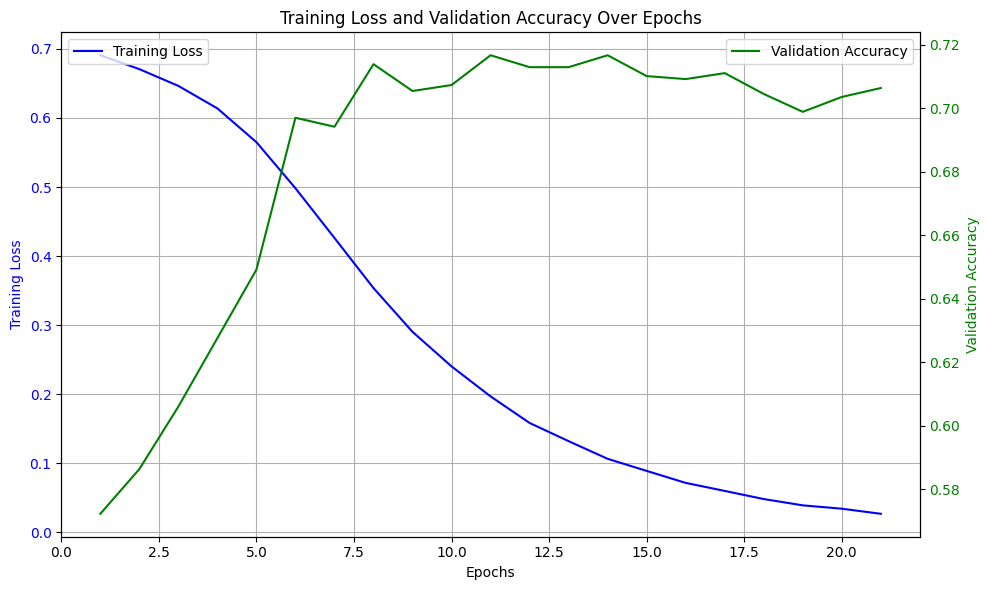

In [9]:
plot_training_progress(train_losses, val_accuracies)

# Results